In [ ]:
!pip install kaggle

In [ ]:
import pandas as pd

# Load the dataset
dataset_path = '/content/mpii_human_pose.csv'
data = pd.read_csv(dataset_path)

# Display a sample of the dataset
data.head()

In [ ]:
from google.colab import files
files.upload()

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"khushbooshali","key":"d268591b16f53e00b4a7efb69ee5c08a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle(1).json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle(2).json

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `cp kaggle(1).json ~/.kaggle/'
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `chmod 600 ~/.kaggle/kaggle(2).json'


In [ ]:
!kaggle datasets download -d harshpatel66/mpii-human-pose

Dataset URL: https://www.kaggle.com/datasets/harshpatel66/mpii-human-pose
License(s): unknown
100% 11.3G/11.3G [02:41<00:00, 129MB/s]
100% 11.3G/11.3G [02:41<00:00, 74.8MB/s]


In [ ]:
from zipfile import ZipFile
file_name="mpii-human-pose.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import pandas as pd

# Load the dataset
dataset_path = '/content/mpii_human_pose.csv'
data = pd.read_csv(dataset_path)

# Display a sample of the dataset
data.head()

,ID,NAME,r ankle_X,r ankle_Y,r knee_X,r knee_Y,r hip_X,r hip_Y,l hip_X,l hip_Y,...,r shoulder_Y,l shoulder_X,l shoulder_Y,l elbow_X,l elbow_Y,l wrist_X,l wrist_Y,Scale,Activity,Category
0,1,015601864.jpg,620,394,616,269,573,185,647,188,...,167,692,185,693,240,688,313,3.021046,curling,sports
1,2,015599452.jpg,-1,-1,-1,-1,806,543,720,593,...,281,719,299,711,516,545,466,5.641276,curling,sports
2,3,005808361.jpg,804,711,816,510,908,438,1040,454,...,253,1067,253,1167,353,1142,478,4.718488,curling,sports
3,4,086617615.jpg,301,461,305,375,201,340,294,342,...,261,314,264,327,320,362,346,2.681349,curling,sports
4,5,060111501.jpg,980,322,896,318,865,248,943,226,...,147,923,123,995,163,961,223,3.806403,curling,sports


In [ ]:
#2. Data Preprocessing
# Remove rows with invalid keypoint data (-1)
filtered_data = data[(data[['r ankle_X', 'r ankle_Y', 'r knee_X', 'r knee_Y']] != -1).all(axis=1)]

# Display a small subset for initial analysis
filtered_data.sample(5)

,ID,NAME,r ankle_X,r ankle_Y,r knee_X,r knee_Y,r hip_X,r hip_Y,l hip_X,l hip_Y,...,r shoulder_Y,l shoulder_X,l shoulder_Y,l elbow_X,l elbow_Y,l wrist_X,l wrist_Y,Scale,Activity,Category
12216,12217,038846364.jpg,645,495,659,394,629,301,616,299,...,179,651,161,709,132,740,107,2.185582,"paddle boarding, standing",water activities
12318,12319,064496377.jpg,1037,503,1064,410,1003,337,960,327,...,197,971,187,904,189,877,159,2.190846,rock climbing,sports
8449,8450,099203847.jpg,793,346,801,308,823,282,808,281,...,227,826,219,819,249,800,264,0.950352,farming,occupation
10523,10524,002899274.jpg,565,597,574,454,580,274,656,283,...,57,681,59,718,168,739,268,2.909053,"fishing, set net, setting net and retrieving f...",fishing and hunting
3999,4000,025715235.jpg,350,531,484,383,582,507,675,513,...,277,767,301,719,387,630,409,3.727966,"pilates, general",conditioning exercise


<ipython-input-8-f383a60551ce>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(keypoints[i], keypoints[i+1], c='r', marker='x')


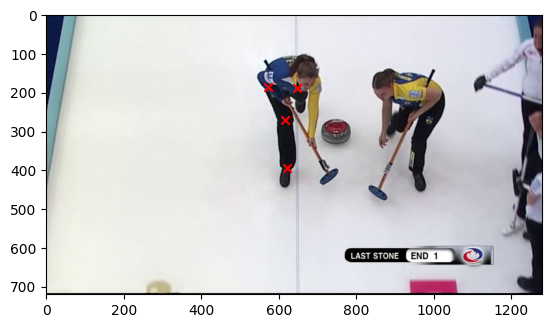

In [ ]:
#3. Visualizing Keypoints
import matplotlib.pyplot as plt
import cv2
import os # Import the os module

# Helper function to visualize keypoints
def visualize_keypoints(image_path, keypoints):
    # Check if the image file exists
    if not os.path.exists(image_path):
        print(f"Error: Image file not found at {image_path}")
        return

    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    # Draw keypoints
    for i in range(0, len(keypoints), 2):
        plt.scatter(keypoints[i], keypoints[i+1], c='r', marker='x')
    plt.show()

# Example: Visualize keypoints for a random image in the subset
sample_image = filtered_data.iloc[0]['NAME']
image_path = f'/content/mpii_human_pose_v1/images/{sample_image}'  # Updated image path
sample_keypoints = filtered_data.iloc[0][['r ankle_X', 'r ankle_Y', 'r knee_X', 'r knee_Y', 'r hip_X', 'r hip_Y',
                                          'l hip_X', 'l hip_Y']]  # Select relevant keypoints
visualize_keypoints(image_path, sample_keypoints)

In [ ]:
pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 15.8 MB/s eta 0:00:00


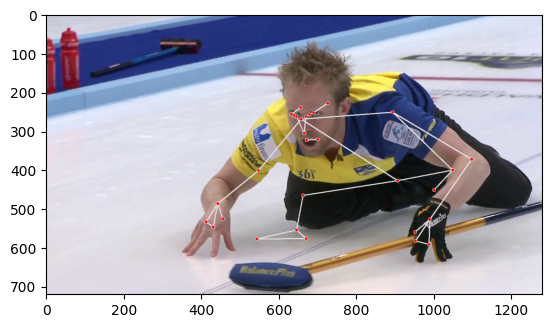

(33, 3)
[0.5205403  0.42560971]


In [ ]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import numpy as np

mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

def estimate_pose_mediapipe(image_path):
    image = cv2.imread(image_path)
    # Check if image was loaded successfully
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return None
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Run pose estimation
    result = pose.process(image_rgb)
    if result.pose_landmarks:
        # Draw the pose landmarks on the image
        mp_drawing = mp.solutions.drawing_utils
        annotated_image = image.copy()
        mp_drawing.draw_landmarks(annotated_image, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        # Display the image with landmarks
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        plt.show()
        # Return the landmarks as a list of keypoints
        keypoints = [(landmark.x, landmark.y, landmark.z) for landmark in result.pose_landmarks.landmark]
        return np.array(keypoints)
    else:
        print("No pose landmarks detected.")
        return None

# Select a sample image from your dataset
sample_image = filtered_data.iloc[5]['NAME']
# Corrected image path
image_path = f'/content/mpii_human_pose_v1/images/{sample_image}'

# Estimate the pose
pose_output = estimate_pose_mediapipe(image_path)

# Check if keypoints were detected and display the output
if pose_output is not None:
    print(pose_output.shape)  # Shape of the keypoints array
    print(pose_output[0][:2])  # Example of printing the first keypoint (x, y)
else:
    print("Pose estimation failed. No keypoints to display.")

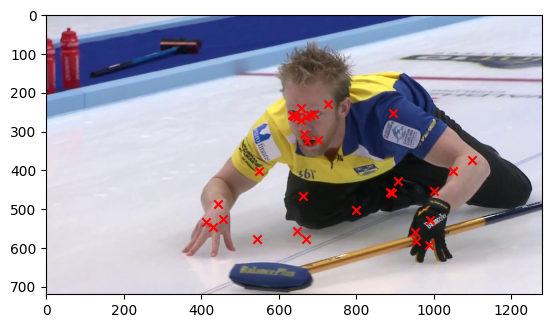

In [ ]:
import matplotlib.pyplot as plt

def visualize_pose(image_path, keypoints):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image from BGR (OpenCV default) to RGB (for displaying in matplotlib)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Overlay the keypoints on the image
    for kp in keypoints:
        x = int(kp[0] * image.shape[1])  # Rescale x to image width
        y = int(kp[1] * image.shape[0])  # Rescale y to image height
        plt.scatter(x, y, c='r', marker='x')  # Plot keypoint

    # Display the image with keypoints
    plt.show()

# Ensure pose_output is not None
if pose_output is not None:
    # Visualize pose on the sample image
    visualize_pose(image_path, pose_output)
else:
    print("No keypoints detected, cannot visualize.")

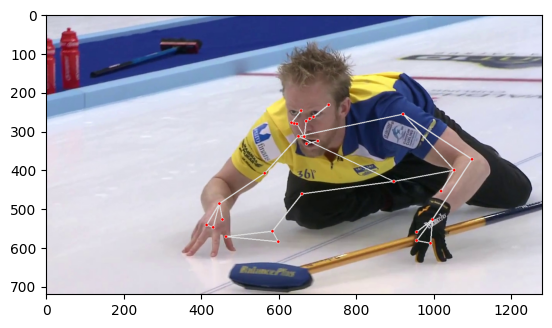

Pose estimation took 0.42 seconds


In [ ]:
import time

start_time = time.time()
pose_output = estimate_pose_mediapipe(image_path)
end_time = time.time()
print(f"Pose estimation took {end_time - start_time:.2f} seconds")


In [ ]:
# Check for invalid keypoints (-1 values)
invalid_keypoints = (data[['r ankle_X', 'r ankle_Y', 'r knee_X', 'r knee_Y',
                           'r hip_X', 'r hip_Y', 'l hip_X', 'l hip_Y']] == -1).sum()

# Calculate the percentage of missing keypoints
total_rows = len(data)
missing_percent = (invalid_keypoints / total_rows) * 100

print("Percentage of missing keypoints:")
print(missing_percent)

Percentage of missing keypoints:
r ankle_X    32.840203
r ankle_Y    32.840203
r knee_X     19.243610
r knee_Y     19.243610
r hip_X       2.665208
r hip_Y       2.665208
l hip_X       2.469491
l hip_Y       2.469491
dtype: float64


In [ ]:
pip install opencv-python

In [ ]:
import matplotlib.pyplot as plt
from time import time
import mediapipe as mp
import cv2 as cv

In [ ]:
mpPose = mp.solutions.pose

In [ ]:
pose = mpPose.Pose(
    static_image_mode=True,
    min_detection_confidence=0.3,
    model_complexity=2
)

In [ ]:
mpDraw = mp.solutions.drawing_utils

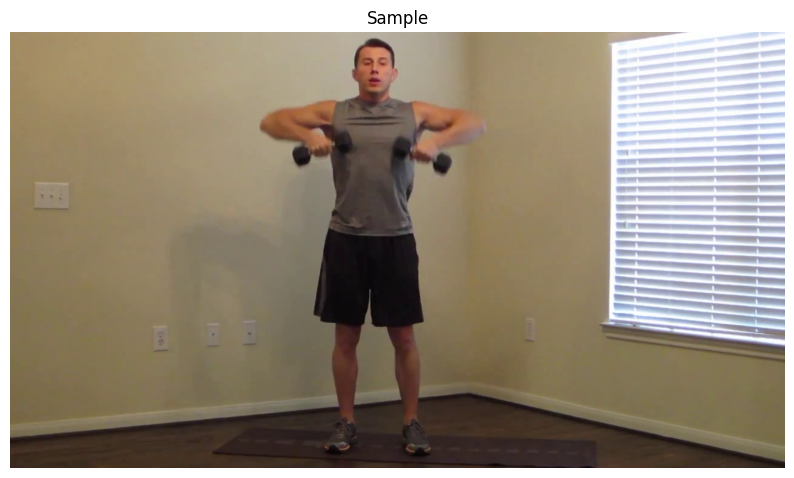

In [ ]:
image = cv.imread('/content/mpii_human_pose_v1/images/000033016.jpg') # Corrected path
plt.figure(figsize=[10, 10])
plt.title('Sample')
plt.axis('off')

if image is not None:  # Check if image was loaded successfully
  plt.imshow(image[:, :, ::-1])
  plt.show()
else:
  print("Error: Could not load image. Please check the file path.")

In [ ]:
result = pose.process(cv.cvtColor(image, cv.COLOR_BGR2RGB))

if result.pose_landmarks:
    for i in range(2):
        print(mpPose.PoseLandmark(i).name)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value])

NOSE
x: 0.470198452
y: 0.0936516225
z: -0.261770606
visibility: 0.999996781

LEFT_EYE_INNER
x: 0.477848619
y: 0.0782431364
z: -0.241443545
visibility: 0.999987721



In [ ]:
result = pose.process(cv.cvtColor(image, cv.COLOR_BGR2RGB))

if result.pose_landmarks:
    for i in range(2):
        print(mpPose.PoseLandmark(i).name)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value])

NOSE
x: 0.470198452
y: 0.0936516225
z: -0.261770606
visibility: 0.999996781

LEFT_EYE_INNER
x: 0.477848619
y: 0.0782431364
z: -0.241443545
visibility: 0.999987721



In [ ]:
imgHeight, imgWidth, _ = image.shape

In [ ]:
if result.pose_landmarks:
    for i in range(2):
        print(mpPose.PoseLandmark(i).name)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value].x * imgWidth)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value].y * imgHeight)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value].z * imgWidth)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value].visibility)

NOSE
601.8540191650391
67.42916822433472
-335.0663757324219
0.9999967813491821
LEFT_EYE_INNER
611.6462326049805
56.33505821228027
-309.04773712158203
0.9999877214431763


In [ ]:
imgCopy = image.copy()

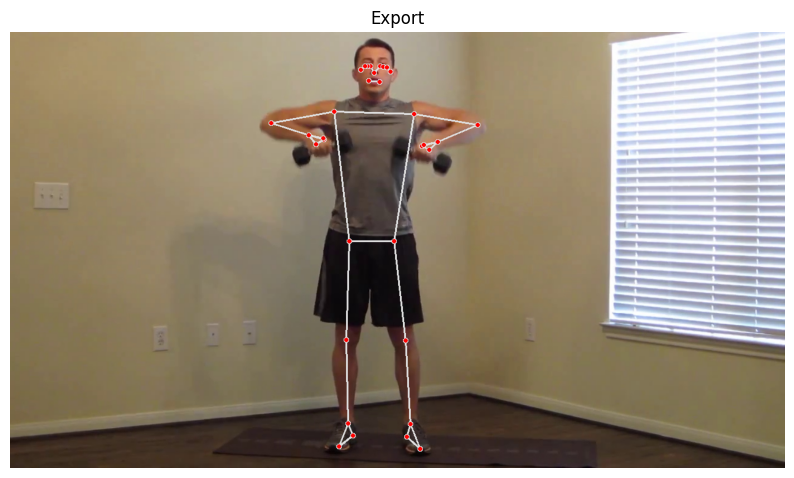

In [ ]:
if result.pose_landmarks:
    mpDraw.draw_landmarks(
        image=imgCopy,
        landmark_list=result.pose_landmarks,
        connections=mpPose.POSE_CONNECTIONS
    )
    fig = plt.figure(figsize=[10, 10])
    plt.title('Export')
    plt.axis('off')
    plt.imshow(imgCopy[:, :, ::-1])
    plt.show()

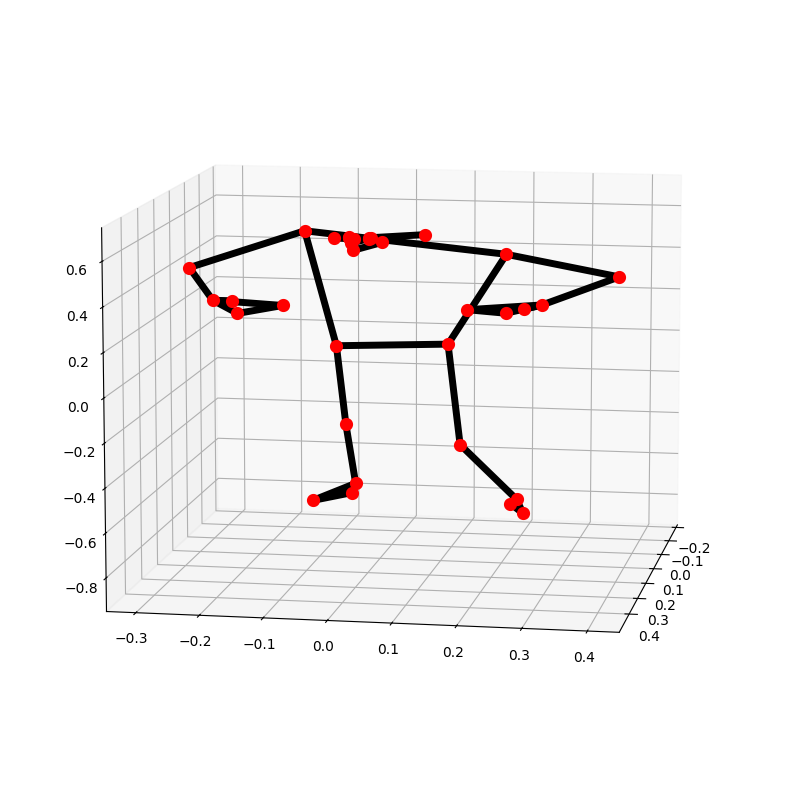

In [ ]:
mpDraw.plot_landmarks(
    result.pose_world_landmarks,
    mpPose.POSE_CONNECTIONS
)

In [ ]:
def detectPose(image, pose, display=True):
    OutputImage = image.copy()
    imageRGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    results = pose.process(imageRGB)
    imgHeight, imgWidth, _ = image.shape
    landmarks = []

    if results.pose_landmarks:
        mpDraw.draw_landmarks(
            image=OutputImage,
            landmark_list=results.pose_landmarks,
            connections=mpPose.POSE_CONNECTIONS
        )
        for landmark in results.pose_landmarks.landmark:
            landmarks.append(
                (int(landmark.x * imgWidth),
                 int(landmark.y * imgHeight),
                 int(landmark.z * imgWidth))
            )
    if display:
        plt.figure(figsize=[22, 22])

        plt.subplot(211)
        plt.title('Original')
        plt.axis('off')
        plt.imshow(image[:, :, ::-1])

        plt.subplot(212)
        plt.title('Output')
        plt.axis('off')
        plt.imshow(OutputImage[:, :, ::-1])

        mpDraw.plot_landmarks(results.pose_world_landmarks, mpPose.POSE_CONNECTIONS)

    else:
        return OutputImage, landmarks

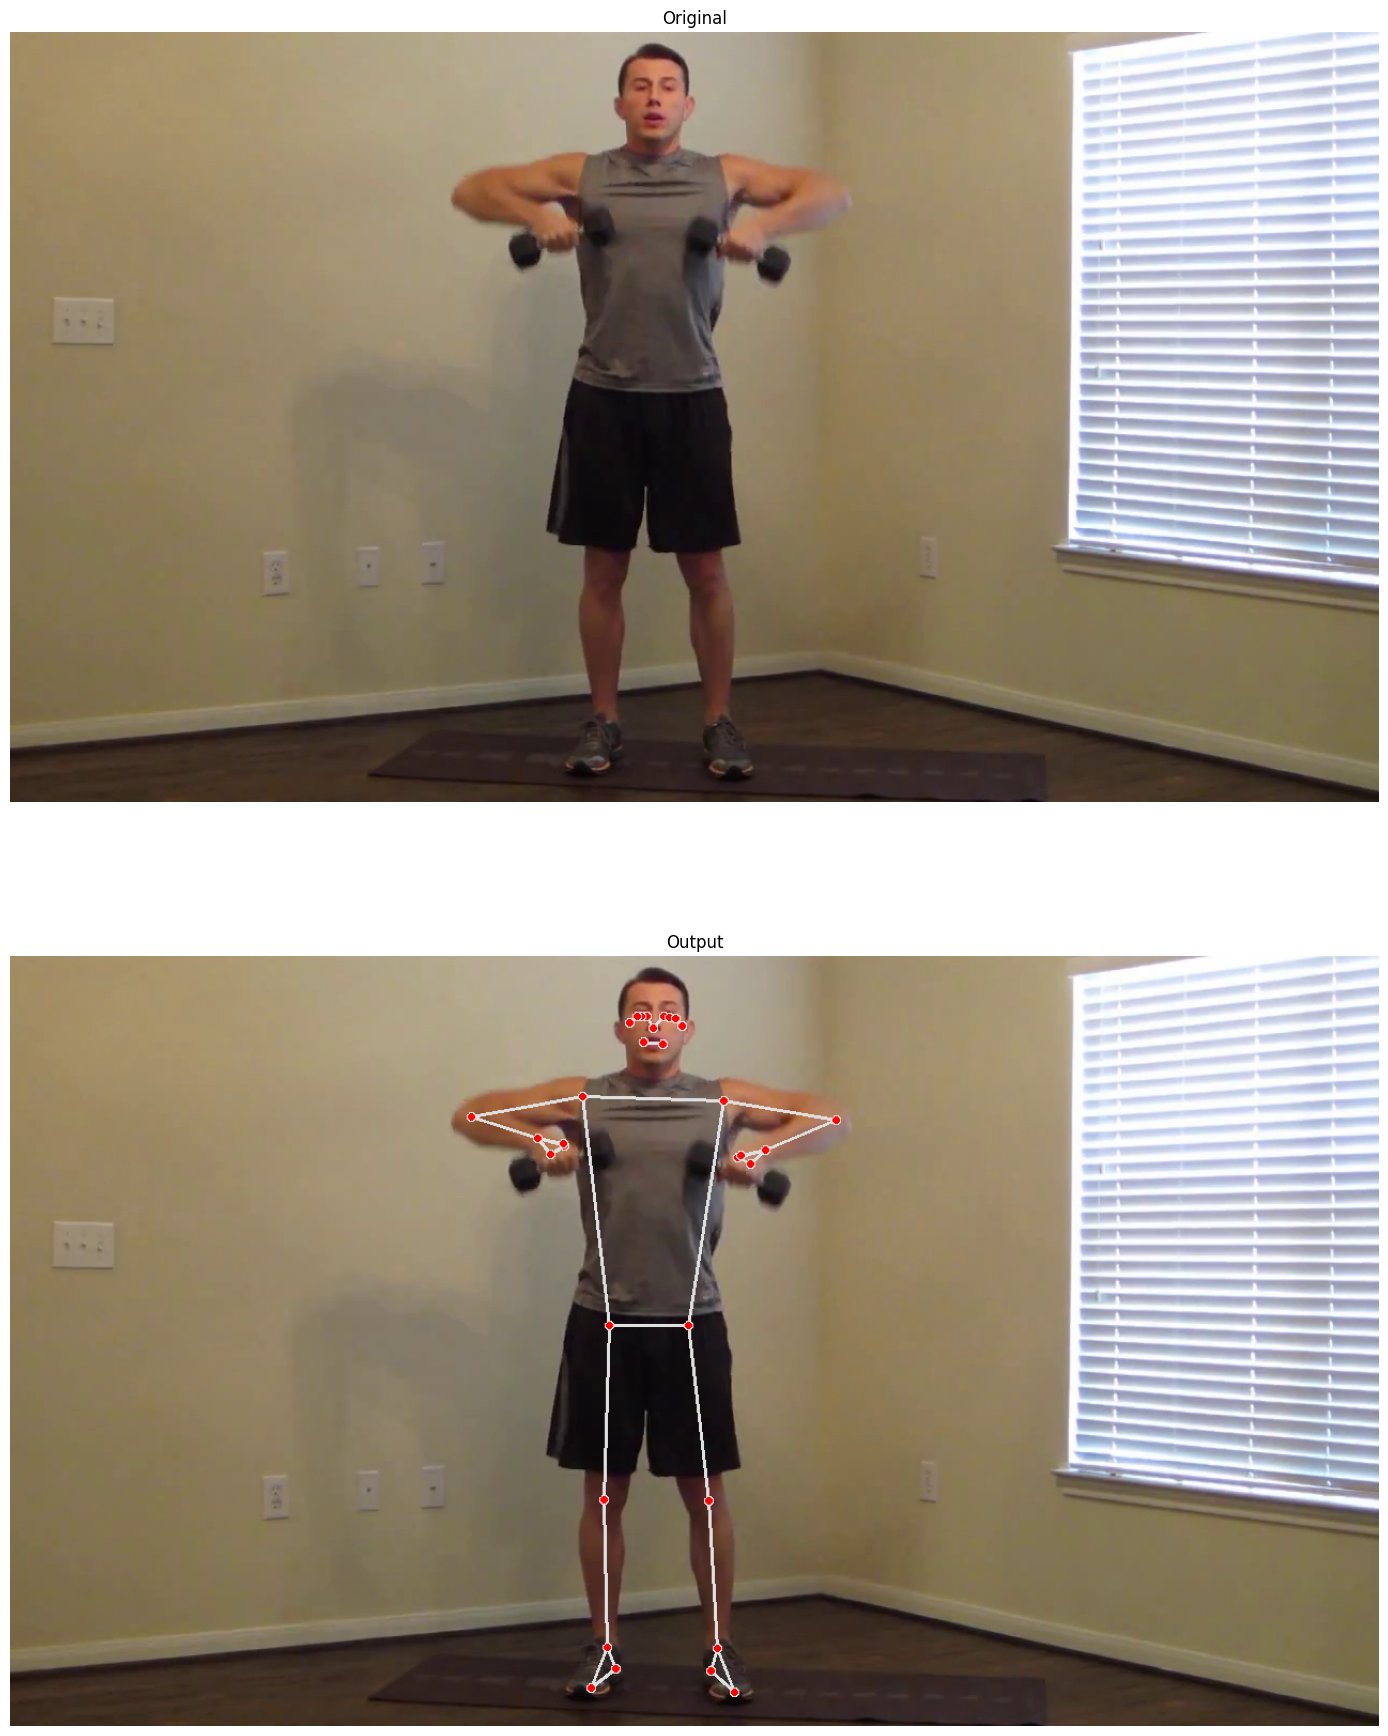

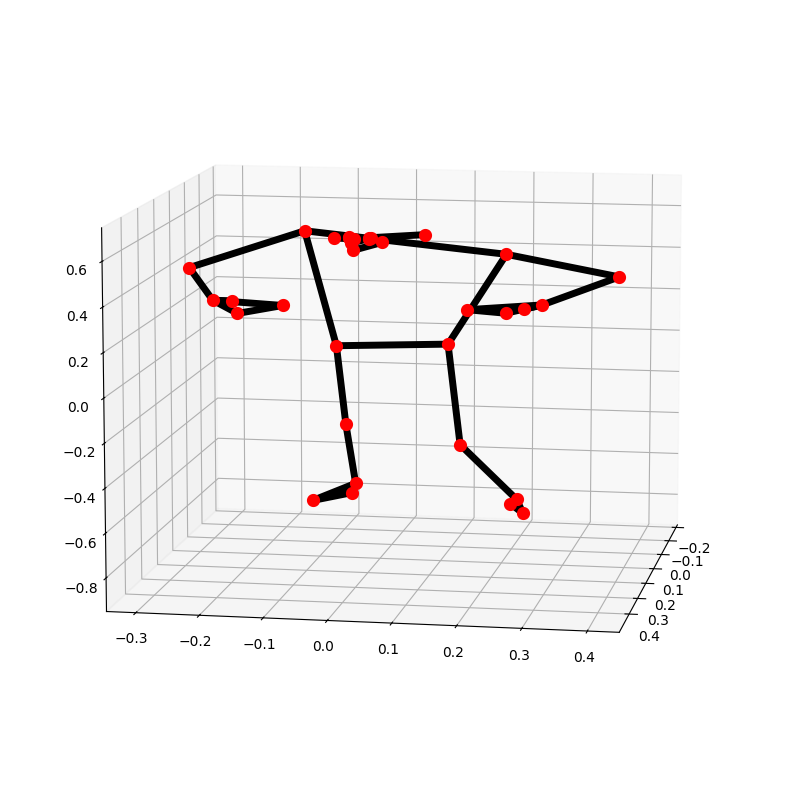

In [ ]:
img = cv.imread('/content/mpii_human_pose_v1/images/000033016.jpg')
detectPose(img, pose, display=True)

Body part segmentation

In [ ]:
!pip install tensorflow matplotlib

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Load the pre-trained DeepLabV3 model
model = tf.keras.applications.DenseNet121(weights="imagenet", include_top=False)

# Define a function to preprocess image for the model
def preprocess_image(image_path, target_size=(512, 512)):
    img = Image.open(image_path).resize(target_size)
    img_array = np.array(img)
    img_array = tf.convert_to_tensor(img_array, dtype=tf.float32)
    img_array = tf.image.per_image_standardization(img_array)  # Normalize
    return tf.expand_dims(img_array, axis=0), img

# Visualize segmentation
def visualize_segmentation(original_img, segmentation_map):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(segmentation_map, cmap="jet")
    plt.title("Segmentation Map")
    plt.axis("off")

    plt.show()


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


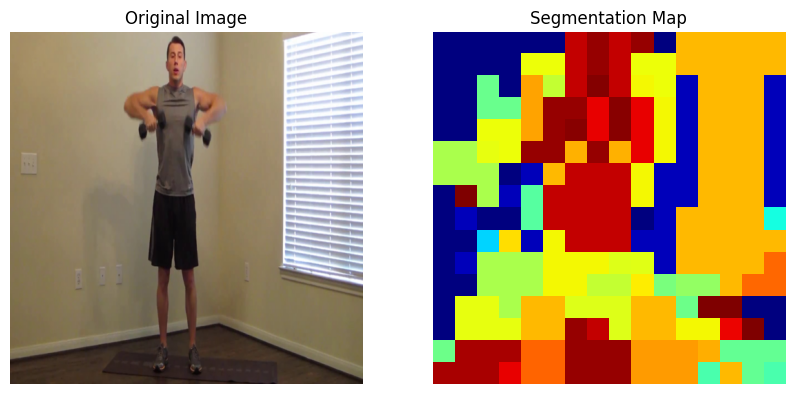

In [ ]:
# Path to dataset images
images_folder = "/content/mpii_human_pose_v1/images"  # Updated path
sample_image = os.path.join(images_folder, "000033016.jpg")  # Replace with a sample image name

# Preprocess and predict
preprocessed_img, original_img = preprocess_image(sample_image)
segmentation_output = model(preprocessed_img)

# Convert output to segmentation map
segmentation_map = tf.argmax(segmentation_output, axis=-1)[0].numpy()

# Visualize the segmentation result
visualize_segmentation(original_img, segmentation_map)

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import os

# Load the pre-trained DeepLabV3 model
model = tf.keras.applications.DenseNet121(weights="imagenet", include_top=False)

# Define a function to preprocess image for the model
def preprocess_image(image_path, target_size=(512, 512)):
    img = Image.open(image_path).resize(target_size)
    img_array = np.array(img)
    img_array = tf.convert_to_tensor(img_array, dtype=tf.float32)
    img_array = tf.image.per_image_standardization(img_array)  # Normalize
    return tf.expand_dims(img_array, axis=0), img

# Path to dataset images
images_folder = "/content/mpii_human_pose_v1/images"  # Updated path
sample_image = os.path.join(images_folder, "000033016.jpg")  # Replace with a sample image name

# Preprocess and predict
preprocessed_img, original_img = preprocess_image(sample_image)
segmentation_output = model(preprocessed_img)

# Get segmentation points (coordinates of segmented pixels)
segmentation_points = []
for i in range(segmentation_output.shape[1]):
    for j in range(segmentation_output.shape[2]):
        predicted_class = tf.argmax(segmentation_output[0, i, j]).numpy()
        if predicted_class != 0:  # Assuming 0 is the background class
            segmentation_points.append((i, j))

# Print or use the segmentation points
print(segmentation_points)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7

In [ ]:
import cv2

# Save segmentation mask
output_folder = "mpii_pose/segmentation_masks"
os.makedirs(output_folder, exist_ok=True)

segmentation_mask_path = os.path.join(output_folder, "000033016_mask.png")
cv2.imwrite(segmentation_mask_path, segmentation_map)


True